In [ ]:
#pip install catboost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

### Dataset Description

In [7]:
data = pd.read_csv("Obesity_Dataset.csv")
data.head(10)

GD    AG    HT    WT   FH   FF   FV   NM         CM   SK   CW   CC  \
0  Female  21.0  1.62  64.0  yes   no  2.0  3.0  Sometimes   no  2.0   no   
1  Female  21.0  1.52  56.0  yes   no  3.0  3.0  Sometimes  yes  3.0  yes   
2    Male  23.0  1.80  77.0  yes   no  2.0  3.0  Sometimes   no  2.0   no   
3    Male  27.0  1.80  87.0   no   no  3.0  3.0  Sometimes   no  2.0   no   
4    Male  22.0  1.78  89.8   no   no  2.0  1.0  Sometimes   no  2.0   no   
5    Male  29.0  1.62  53.0   no  yes  2.0  3.0  Sometimes   no  2.0   no   
6  Female  23.0  1.50  55.0  yes  yes  3.0  3.0  Sometimes   no  2.0   no   
7    Male  22.0  1.64  53.0   no   no  2.0  3.0  Sometimes   no  2.0   no   
8    Male  24.0  1.78  64.0  yes  yes  3.0  3.0  Sometimes   no  2.0   no   
9    Male  22.0  1.72  68.0  yes  yes  2.0  3.0  Sometimes   no  2.0   no   

    FA   TD          CA                     TU                   OB  
0  0.0  1.0          no  Public_Transportation        Normal_Weight  
1  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
2  2.0  1.0  Frequently  Public_Transportation        Normal_Weight  
3  2.0  0.0  Frequently                Walking   Overweight_Level_I  
4  0.0  0.0   Sometimes  Public_Transportation  Overweight_Level_II  
5  0.0  0.0   Sometimes             Automobile        Normal_Weight  
6  1.0  0.0   Sometimes              Motorbike        Normal_Weight  
7  3.0  0.0   Sometimes  Public_Transportation        Normal_Weight  
8  1.0  1.0  Frequently  Public_Transportation        Normal_Weight  
9  1.0  1.0          no  Public_Transportation        Normal_Weight

In [8]:
data.tail()

GD         AG        HT          WT   FH   FF   FV   NM         CM  \
2106  Female  20.976842  1.710730  131.408528  yes  yes  3.0  3.0  Sometimes   
2107  Female  21.982942  1.748584  133.742943  yes  yes  3.0  3.0  Sometimes   
2108  Female  22.524036  1.752206  133.689352  yes  yes  3.0  3.0  Sometimes   
2109  Female  24.361936  1.739450  133.346641  yes  yes  3.0  3.0  Sometimes   
2110  Female  23.664709  1.738836  133.472641  yes  yes  3.0  3.0  Sometimes   

      SK        CW  CC        FA        TD         CA                     TU  \
2106  no  1.728139  no  1.676269  0.906247  Sometimes  Public_Transportation   
2107  no  2.005130  no  1.341390  0.599270  Sometimes  Public_Transportation   
2108  no  2.054193  no  1.414209  0.646288  Sometimes  Public_Transportation   
2109  no  2.852339  no  1.139107  0.586035  Sometimes  Public_Transportation   
2110  no  2.863513  no  1.026452  0.714137  Sometimes  Public_Transportation   

                    OB  
2106  Obesity_Type_III  
2107  Obesity_Type_III  
2108  Obesity_Type_III  
2109  Obesity_Type_III  
2110  Obesity_Type_III

In [9]:
#Shape of Data
data.shape

(2111, 17)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GD      2111 non-null   object 
 1   AG      2111 non-null   float64
 2   HT      2111 non-null   float64
 3   WT      2111 non-null   float64
 4   FH      2111 non-null   object 
 5   FF      2111 non-null   object 
 6   FV      2111 non-null   float64
 7   NM      2111 non-null   float64
 8   CM      2111 non-null   object 
 9   SK      2111 non-null   object 
 10  CW      2111 non-null   float64
 11  CC      2111 non-null   object 
 12  FA      2111 non-null   float64
 13  TD      2111 non-null   float64
 14  CA      2111 non-null   object 
 15  TU      2111 non-null   object 
 16  OB      2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [11]:
#lets describe the data
data.describe()

AG           HT           WT           FV           NM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CW           FA           TD  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [12]:
data.count()

GD    2111
AG    2111
HT    2111
WT    2111
FH    2111
FF    2111
FV    2111
NM    2111
CM    2111
SK    2111
CW    2111
CC    2111
FA    2111
TD    2111
CA    2111
TU    2111
OB    2111
dtype: int64

In [13]:
data.isnull().sum()

GD    0
AG    0
HT    0
WT    0
FH    0
FF    0
FV    0
NM    0
CM    0
SK    0
CW    0
CC    0
FA    0
TD    0
CA    0
TU    0
OB    0
dtype: int64

In [14]:
data['OB'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: OB, dtype: int64

## Label Encoding

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['GD']= label_encoder.fit_transform(data['GD'])

data['GD'].unique()

array([0, 1])

In [16]:
label_encoder = preprocessing.LabelEncoder()
data['FH']= label_encoder.fit_transform(data['FH'])

data['FH'].unique()

array([1, 0])

In [17]:
label_encoder = preprocessing.LabelEncoder()
data['FF']= label_encoder.fit_transform(data['FF'])

data['FF'].unique()

array([0, 1])

In [18]:
label_encoder = preprocessing.LabelEncoder()
data['CM']= label_encoder.fit_transform(data['CM'])

data['CM'].unique()

array([2, 1, 0, 3])

In [19]:
label_encoder = preprocessing.LabelEncoder()
data['SK']= label_encoder.fit_transform(data['SK'])

data['SK'].unique()

array([0, 1])

In [20]:
label_encoder = preprocessing.LabelEncoder()
data['CC']= label_encoder.fit_transform(data['CC'])

data['CC'].unique()

array([0, 1])

In [21]:
label_encoder = preprocessing.LabelEncoder()
data['CA']= label_encoder.fit_transform(data['CA'])

data['CA'].unique()

array([3, 2, 1, 0])

In [22]:
label_encoder = preprocessing.LabelEncoder()
data['OB']= label_encoder.fit_transform(data['OB'])

data['OB'].unique()

array([1, 5, 6, 2, 0, 3, 4])

In [23]:
label_encoder = preprocessing.LabelEncoder()
data['TU']= label_encoder.fit_transform(data['TU'])

data['TU'].unique()

array([3, 4, 0, 2, 1])

In [24]:
data.describe()

GD           AG           HT           WT           FH  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058     0.817622   
std       0.500083     6.345968     0.093305    26.191172     0.386247   
min       0.000000    14.000000     1.450000    39.000000     0.000000   
25%       0.000000    19.947192     1.630000    65.473343     1.000000   
50%       1.000000    22.777890     1.700499    83.000000     1.000000   
75%       1.000000    26.000000     1.768464   107.430682     1.000000   
max       1.000000    61.000000     1.980000   173.000000     1.000000   

                FF           FV           NM           CM           SK  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.883941     2.419043     2.685628     1.859308     0.020843   
std       0.320371     0.533927     0.778039     0.468543     0.142893   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%       1.000000     2.000000     2.658738     2.000000     0.000000   
50%       1.000000     2.385502     3.000000     2.000000     0.000000   
75%       1.000000     3.000000     3.000000     2.000000     0.000000   
max       1.000000     3.000000     4.000000     3.000000     1.000000   

                CW           CC           FA           TD           CA  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.008011     0.045476     1.010298     0.657866     2.268593   
std       0.612953     0.208395     0.850592     0.608927     0.515498   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.584812     0.000000     0.124505     0.000000     2.000000   
50%       2.000000     0.000000     1.000000     0.625350     2.000000   
75%       2.477420     0.000000     1.666678     1.000000     3.000000   
max       3.000000     1.000000     3.000000     2.000000     3.000000   

                TU           OB  
count  2111.000000  2111.000000  
mean      2.365230     3.015632  
std       1.261423     1.952090  
min       0.000000     0.000000  
25%       3.000000     1.000000  
50%       3.000000     3.000000  
75%       3.000000     5.000000  
max       4.000000     6.000000

In [25]:
data.head(10)

GD    AG    HT    WT  FH  FF   FV   NM  CM  SK   CW  CC   FA   TD  CA  TU  \
0   0  21.0  1.62  64.0   1   0  2.0  3.0   2   0  2.0   0  0.0  1.0   3   3   
1   0  21.0  1.52  56.0   1   0  3.0  3.0   2   1  3.0   1  3.0  0.0   2   3   
2   1  23.0  1.80  77.0   1   0  2.0  3.0   2   0  2.0   0  2.0  1.0   1   3   
3   1  27.0  1.80  87.0   0   0  3.0  3.0   2   0  2.0   0  2.0  0.0   1   4   
4   1  22.0  1.78  89.8   0   0  2.0  1.0   2   0  2.0   0  0.0  0.0   2   3   
5   1  29.0  1.62  53.0   0   1  2.0  3.0   2   0  2.0   0  0.0  0.0   2   0   
6   0  23.0  1.50  55.0   1   1  3.0  3.0   2   0  2.0   0  1.0  0.0   2   2   
7   1  22.0  1.64  53.0   0   0  2.0  3.0   2   0  2.0   0  3.0  0.0   2   3   
8   1  24.0  1.78  64.0   1   1  3.0  3.0   2   0  2.0   0  1.0  1.0   1   3   
9   1  22.0  1.72  68.0   1   1  2.0  3.0   2   0  2.0   0  1.0  1.0   3   3   

   OB  
0   1  
1   1  
2   1  
3   5  
4   6  
5   1  
6   1  
7   1  
8   1  
9   1

## Exploarory Data Analysis

In [26]:
# sns.pairplot(data)

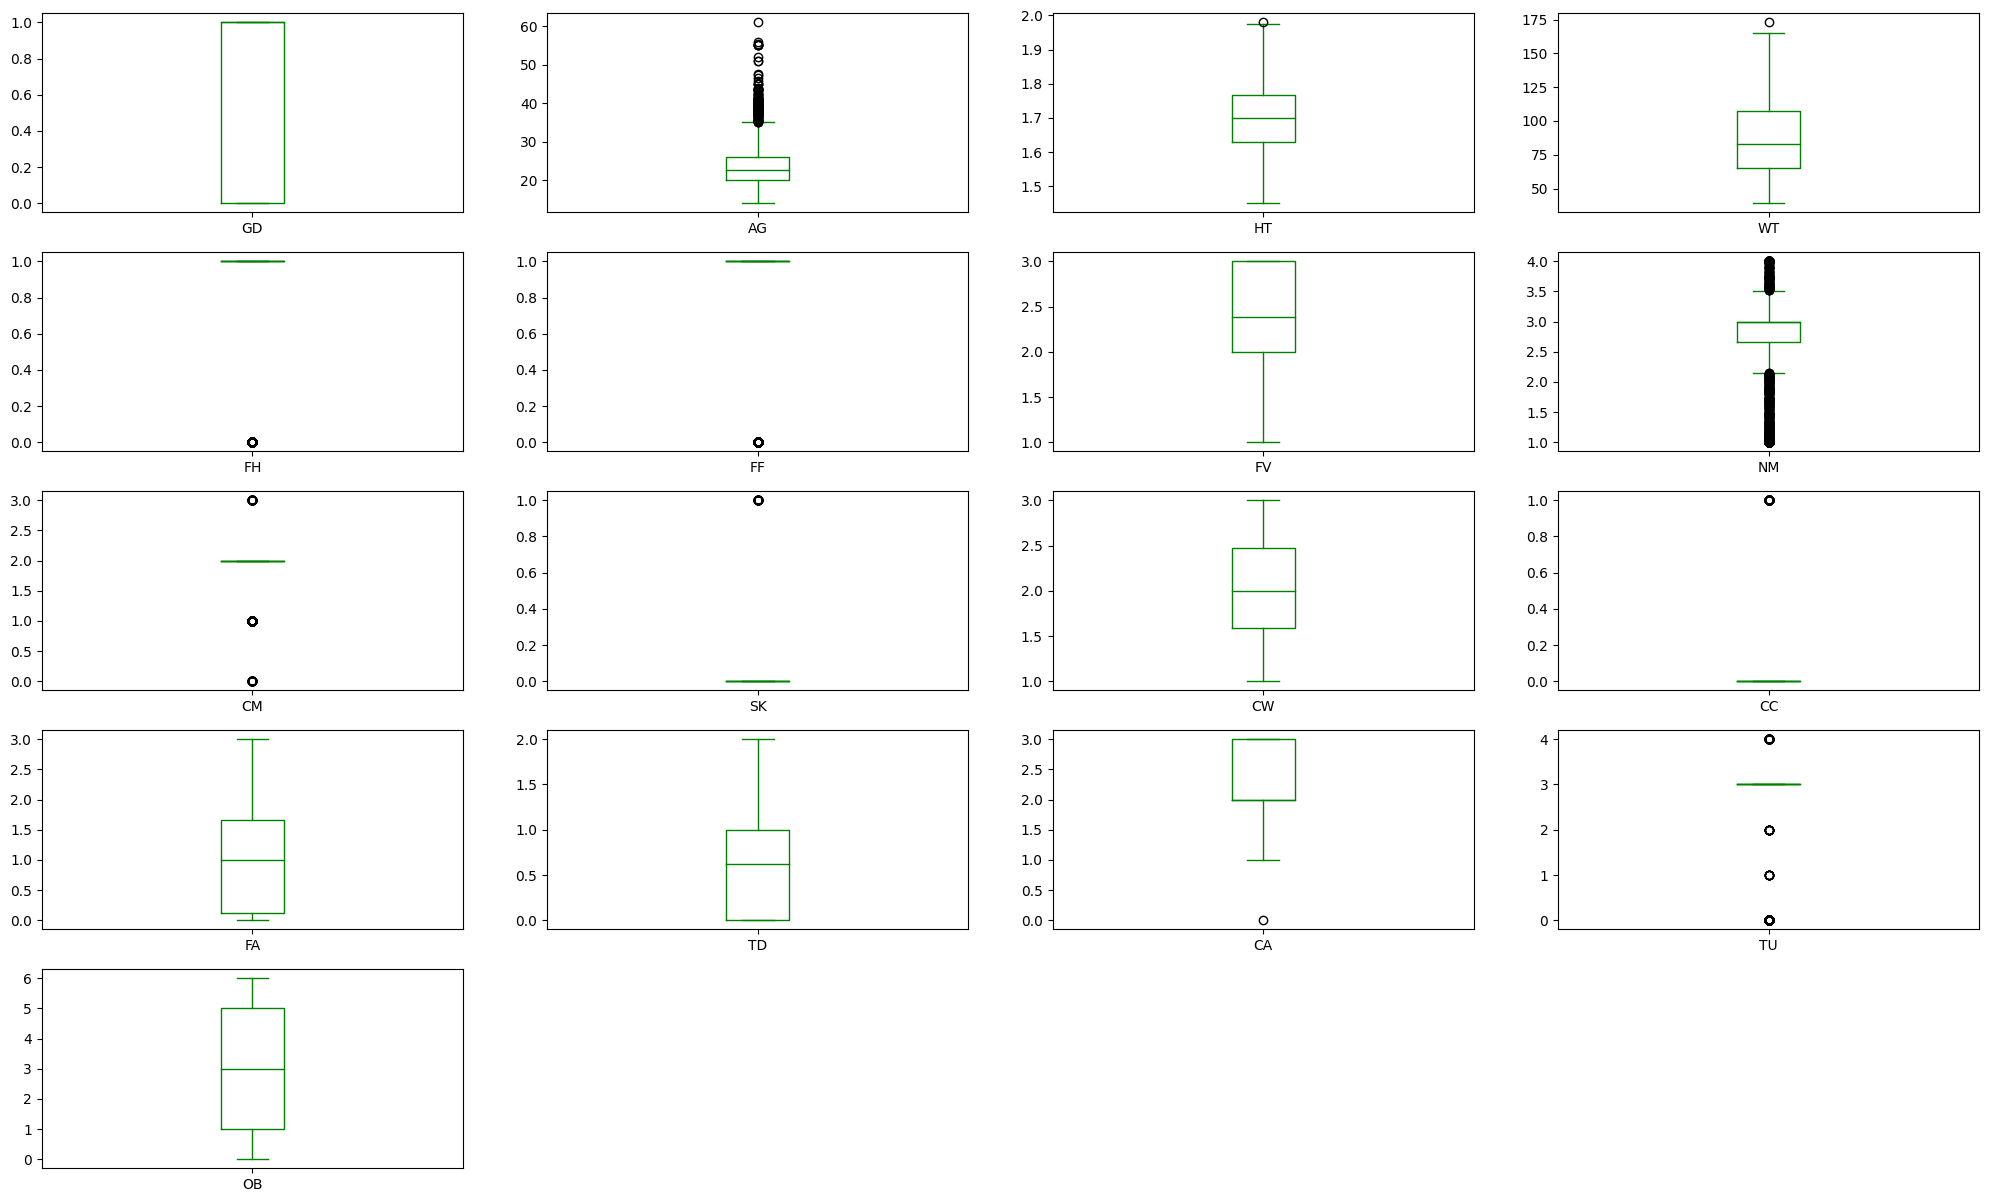

In [27]:
data.plot(color = 'green', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

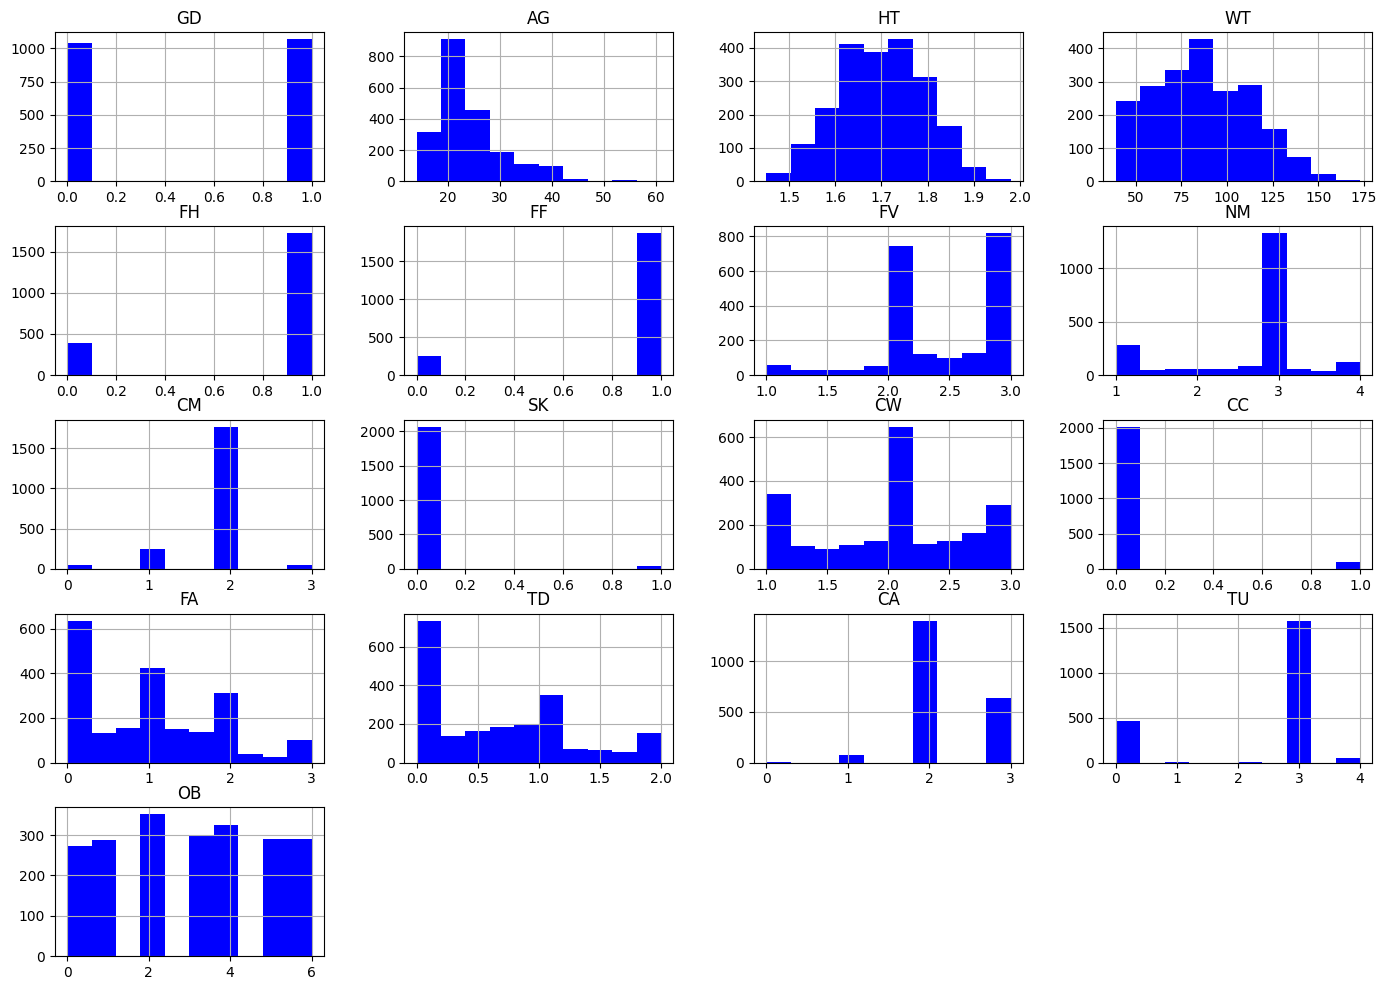

In [28]:
#histogram
data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

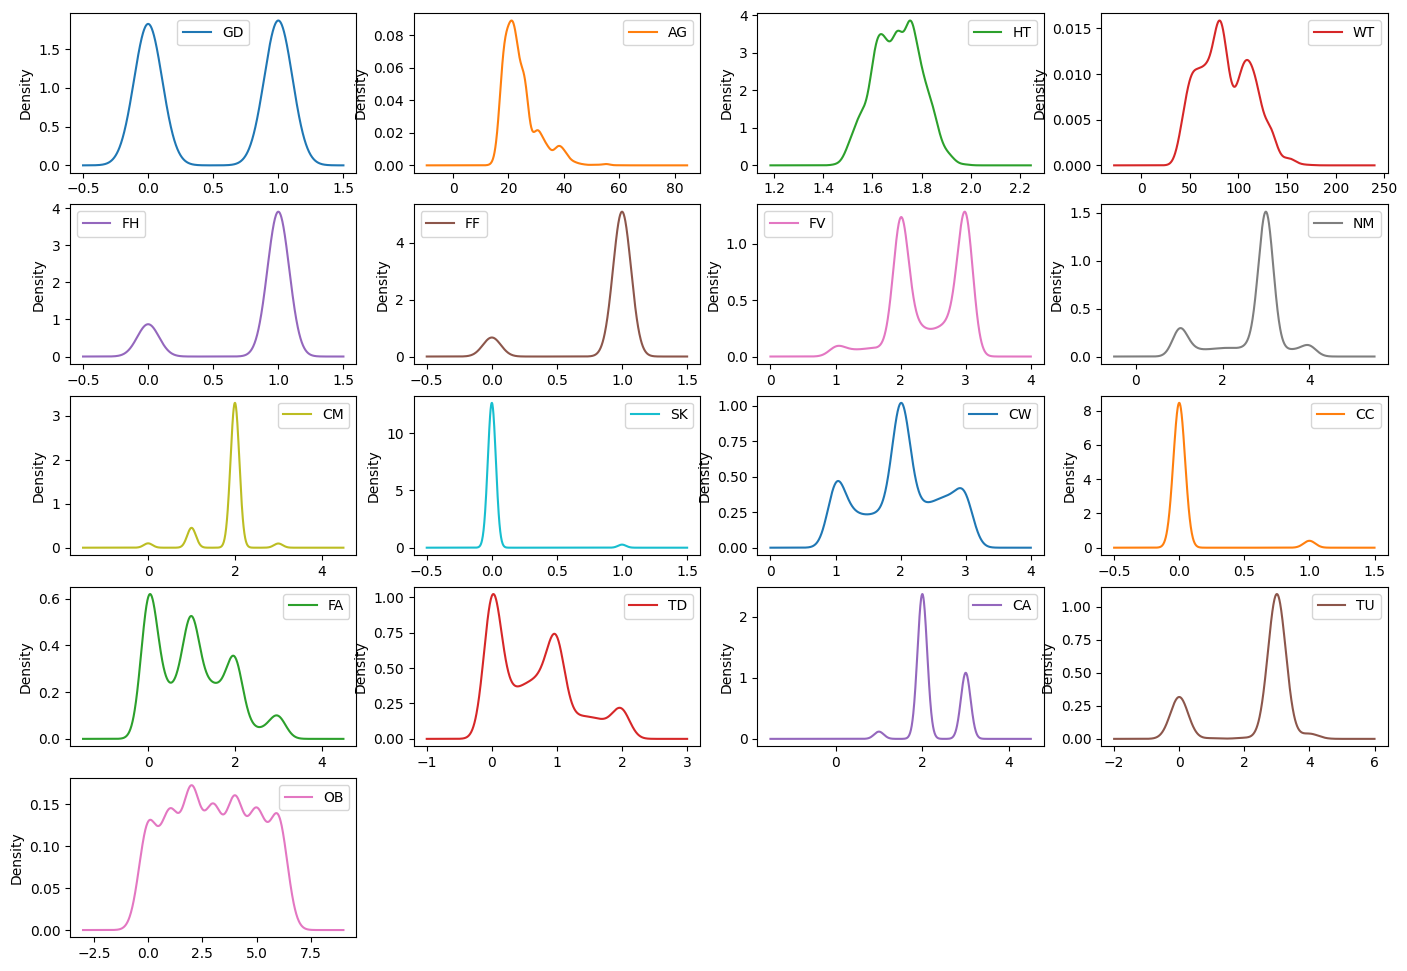

In [29]:
#Boxplot of each column
data.plot( kind='density', figsize=(17,12), subplots=True, layout=(5,4),sharex=False)

plt.show()


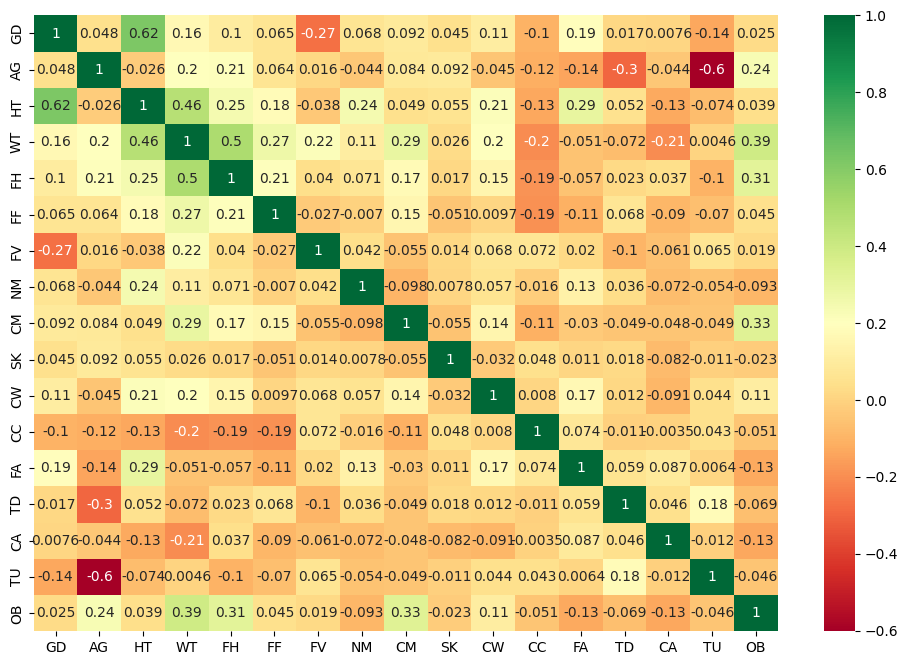

In [30]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data Preprocessing

In [31]:
#checking for the out layers with STD
print("Highest allowed",data['AG'].mean() + 3*data['AG'].std())
print("Lowest allowed",data['AG'].mean() - 3*data['AG'].std())

Highest allowed 43.35050472977086
Lowest allowed 5.274695087377413


In [32]:
#dealing with out layer values
data[(data['AG'] > 35) | (data['AG'] < 5.274)]


GD         AG        HT          WT  FH  FF        FV        NM  CM  SK  \
13     1  41.000000  1.800000   99.000000   0   1  2.000000  3.000000   2   0   
21     0  52.000000  1.690000   87.000000   1   1  3.000000  1.000000   2   1   
33     1  39.000000  1.790000   90.000000   0   0  2.000000  1.000000   2   0   
92     1  55.000000  1.780000   84.000000   1   0  3.000000  4.000000   1   0   
104    0  38.000000  1.560000   80.000000   1   1  2.000000  3.000000   2   0   
...   ..        ...       ...         ...  ..  ..       ...       ...  ..  ..   
1740   1  37.765356  1.763582  117.861590   1   1  2.145114  2.888193   2   0   
1775   1  37.207082  1.762921  118.401740   1   1  2.136830  2.993084   2   0   
1776   1  38.108940  1.752863  119.201465   1   1  2.499388  2.989791   2   0   
1777   1  38.644441  1.768235  117.792268   1   1  2.230742  2.920373   2   0   
1778   1  38.112989  1.766888  118.134898   1   1  2.240757  2.911568   2   0   

            CW  CC        FA       TD  CA  TU  OB  
13    2.000000   0  2.000000  1.00000   1   0   2  
21    2.000000   0  0.000000  0.00000   3   0   2  
33    2.000000   0  0.000000  0.00000   2   3   6  
92    3.000000   1  3.000000  0.00000   1   4   5  
104   2.000000   0  0.000000  0.00000   2   0   2  
...        ...  ..       ...      ...  ..  ..  ..  
1740  2.038128   0  0.852344  0.00000   2   0   3  
1775  1.885926   0  0.615298  0.00000   2   0   3  
1776  1.959777   0  0.608100  0.64676   2   0   3  
1777  1.831187   0  0.756277  0.00000   2   0   3  
1778  1.895876   0  0.822186  0.00000   2   0   3  

[168 rows x 17 columns]

In [33]:
new_df = data[(data['AG'] <35) & (data['AG'] >5.274)]
new_df

GD         AG        HT          WT  FH  FF   FV   NM  CM  SK        CW  \
0      0  21.000000  1.620000   64.000000   1   0  2.0  3.0   2   0  2.000000   
1      0  21.000000  1.520000   56.000000   1   0  3.0  3.0   2   1  3.000000   
2      1  23.000000  1.800000   77.000000   1   0  2.0  3.0   2   0  2.000000   
3      1  27.000000  1.800000   87.000000   0   0  3.0  3.0   2   0  2.000000   
4      1  22.000000  1.780000   89.800000   0   0  2.0  1.0   2   0  2.000000   
...   ..        ...       ...         ...  ..  ..  ...  ...  ..  ..       ...   
2106   0  20.976842  1.710730  131.408528   1   1  3.0  3.0   2   0  1.728139   
2107   0  21.982942  1.748584  133.742943   1   1  3.0  3.0   2   0  2.005130   
2108   0  22.524036  1.752206  133.689352   1   1  3.0  3.0   2   0  2.054193   
2109   0  24.361936  1.739450  133.346641   1   1  3.0  3.0   2   0  2.852339   
2110   0  23.664709  1.738836  133.472641   1   1  3.0  3.0   2   0  2.863513   

      CC        FA        TD  CA  TU  OB  
0      0  0.000000  1.000000   3   3   1  
1      1  3.000000  0.000000   2   3   1  
2      0  2.000000  1.000000   1   3   1  
3      0  2.000000  0.000000   1   4   5  
4      0  0.000000  0.000000   2   3   6  
...   ..       ...       ...  ..  ..  ..  
2106   0  1.676269  0.906247   2   3   4  
2107   0  1.341390  0.599270   2   3   4  
2108   0  1.414209  0.646288   2   3   4  
2109   0  1.139107  0.586035   2   3   4  
2110   0  1.026452  0.714137   2   3   4  

[1940 rows x 17 columns]

In [34]:
#storing the values
upper_limit = data['AG'].mean() + 3*data['AG'].std()
lower_limit = data['AG'].mean() - 3*data['AG'].std()

In [35]:
data['AG'] = np.where(
    data['AG']>upper_limit,
    upper_limit,
    np.where(
        data['AG']<lower_limit,
        lower_limit,
        data['AG']
    )
)

C:\Users\Shahid Mohammad\AppData\Local\Temp\ipykernel_13028\2617825461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AG'])
C:\Users\Shahid Mohammad\AppData\Local\Temp\ipykernel_13028\2617825461.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['AG'])


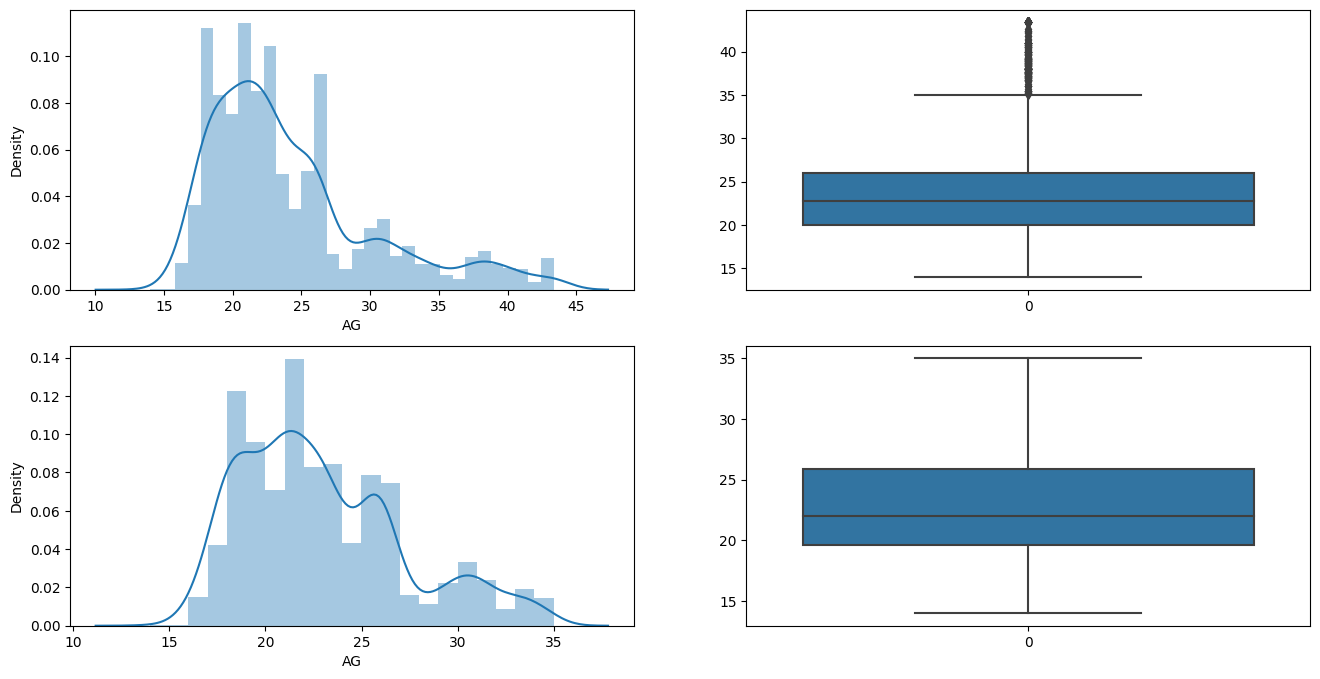

In [36]:
#ploting the outlayer removing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['AG'])
plt.subplot(2,2,2)
sns.boxplot(data['AG'])
plt.subplot(2,2,3)
sns.distplot(new_df['AG'])
plt.subplot(2,2,4)
sns.boxplot(new_df['AG'])
plt.show()

In [37]:
import plotly.graph_objects as go

In [38]:
column_names = data.columns
no_of_boxes = len(column_names)
colors = [ 'hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, no_of_boxes)]

fig = go.Figure(data = [go.Box(y = data.loc[:, column_names[i]], marker_color = colors[i], name = column_names[i], boxmean = True, showlegend = True) for i in range(no_of_boxes)])

fig.update_layout(
    xaxis=dict(showgrid = True, zeroline = True, showticklabels = True),
    yaxis=dict(zeroline = True, gridcolor = 'white'),
    paper_bgcolor = 'rgb(233,233,233)',
    plot_bgcolor = 'rgb(233,233,233)')

fig.show()

In [39]:
data.columns

Index(['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC',
       'FA', 'TD', 'CA', 'TU', 'OB'],
      dtype='object')

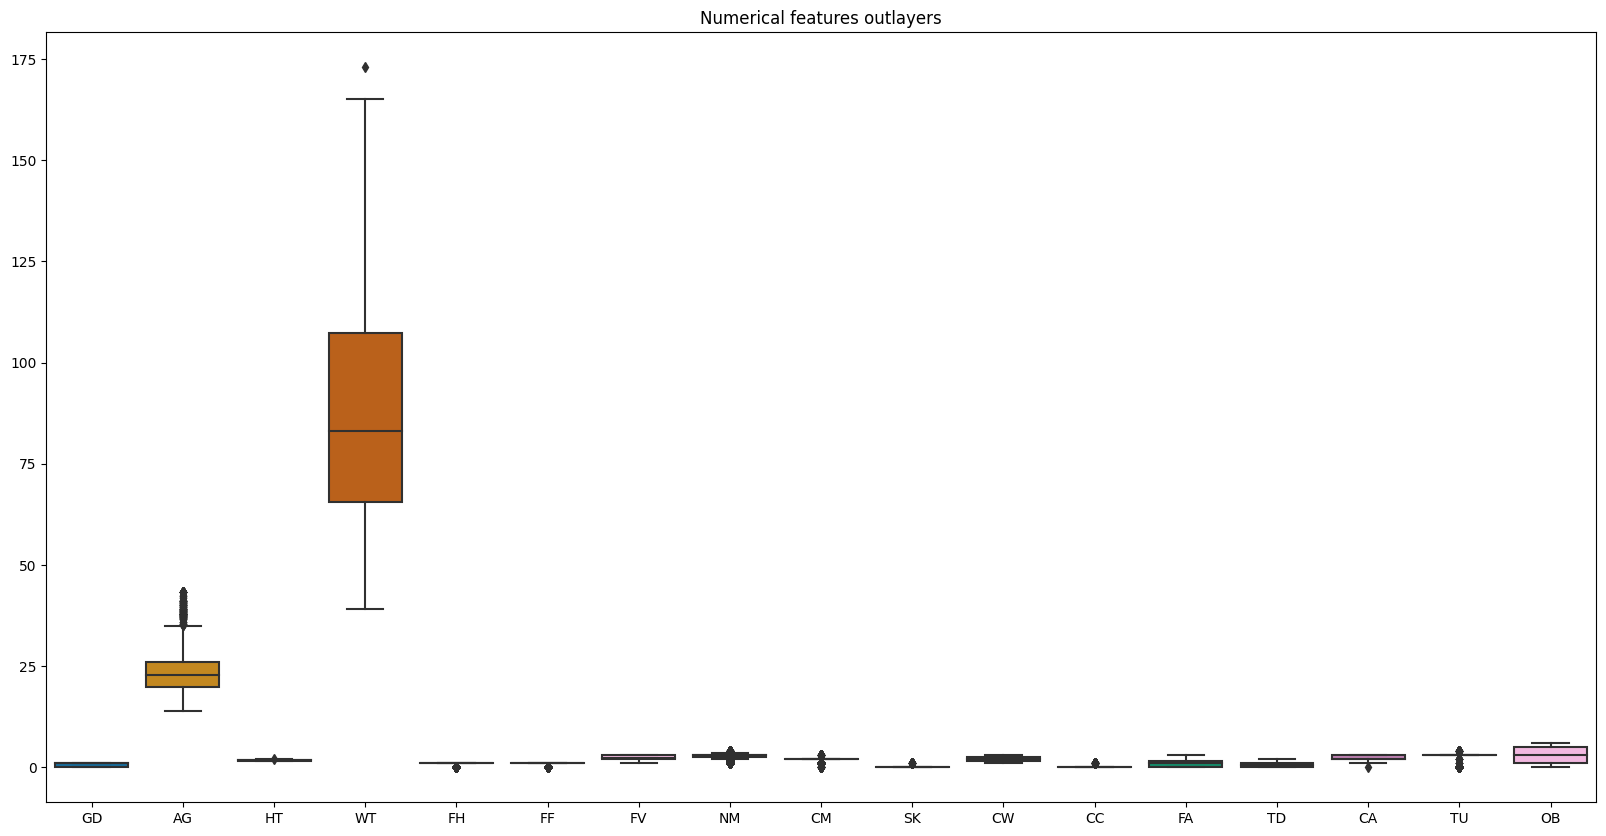

In [40]:
# Plotting boxplots to numeric features
num_var = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']
plt.figure(figsize=(20,10))
sns.boxplot(data=data[num_var],
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [41]:
#reading data from pandas
col_names = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']
#df = pd.read_csv("Obesity_Dataset.csv", header=1, names=col_names)

<AxesSubplot: >

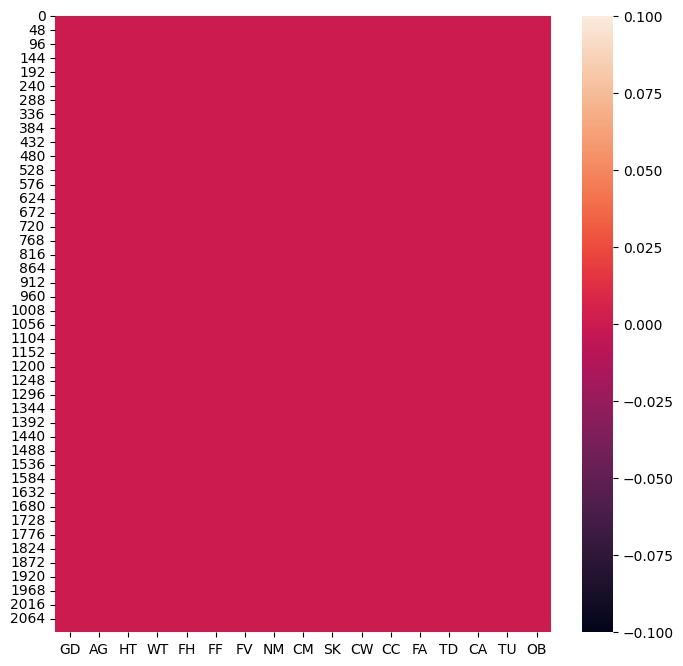

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

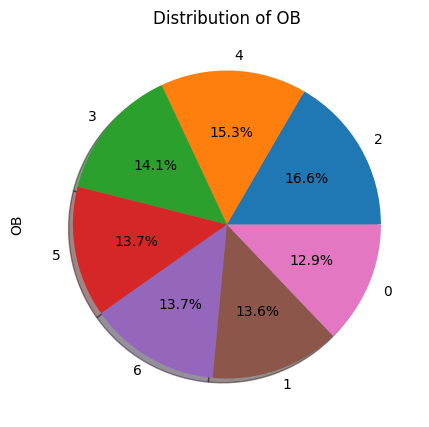

In [43]:
ob_series = pd.Series(data['OB'])
# Plot the pie chart
plt.figure(figsize=(15, 5))
data['OB'].value_counts().plot.pie(explode=None, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of OB')
plt.show()


In [44]:
#check the group by values
data['OB'].value_counts()

2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: OB, dtype: int64

## FacetGrid for each Attribute

In [45]:
data.columns

Index(['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC',
       'FA', 'TD', 'CA', 'TU', 'OB'],
      dtype='object')

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

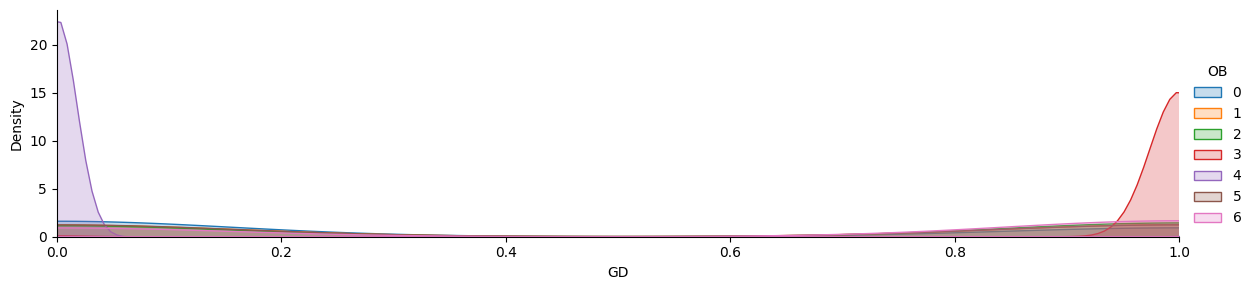

In [46]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'GD', shade=True,)
oldest = data['GD'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

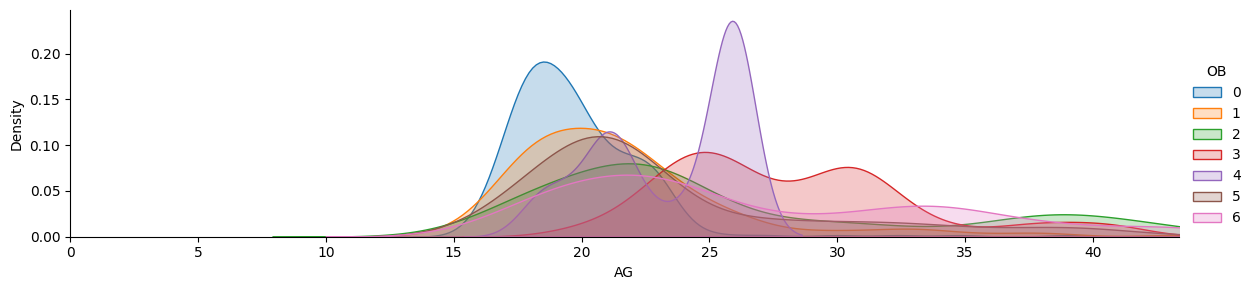

In [47]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'AG', shade=True,)
oldest = data['AG'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

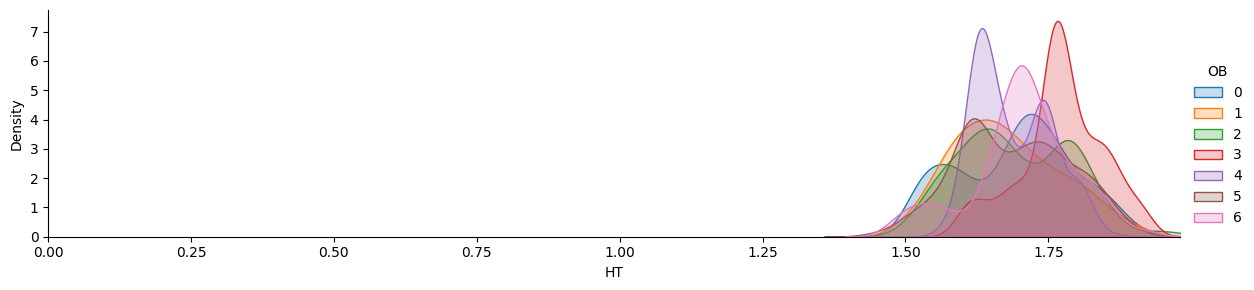

In [48]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'HT', shade=True,)
oldest = data['HT'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

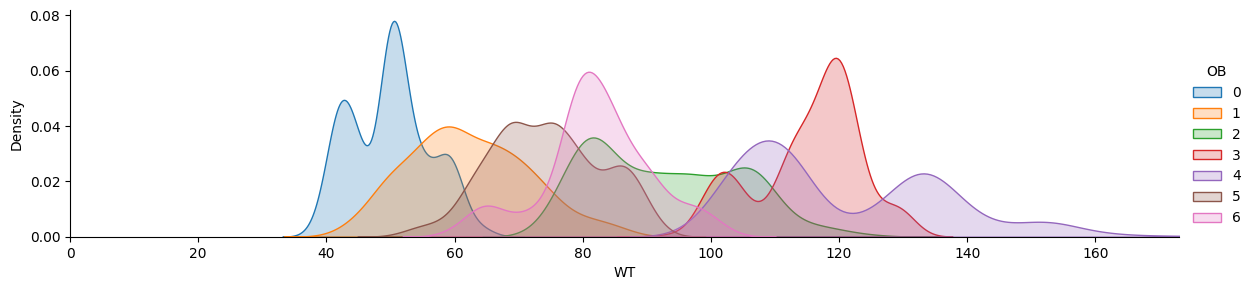

In [49]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'WT', shade=True,)
oldest = data['WT'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

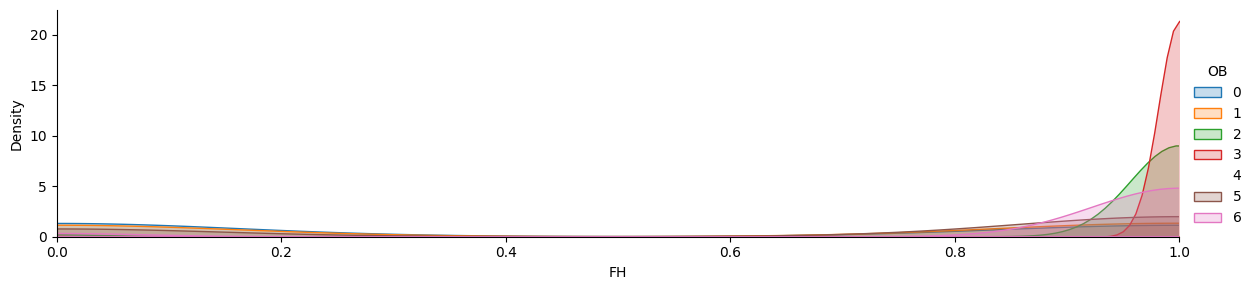

In [50]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'FH', shade=True,)
oldest = data['FH'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

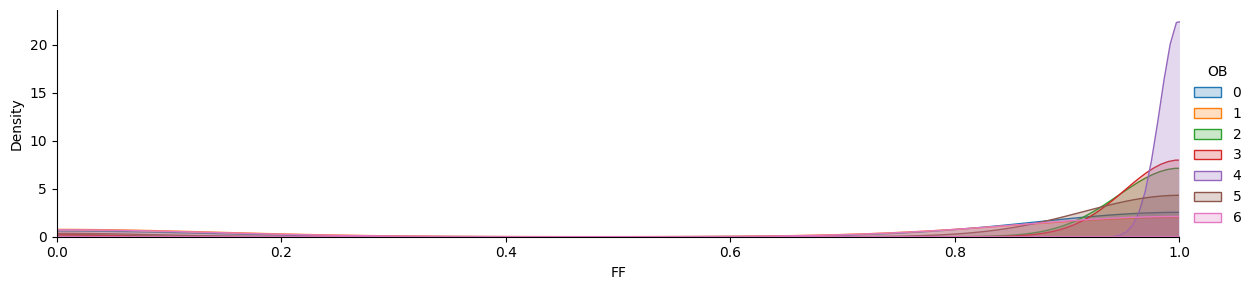

In [51]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'FF', shade=True,)
oldest = data['FF'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

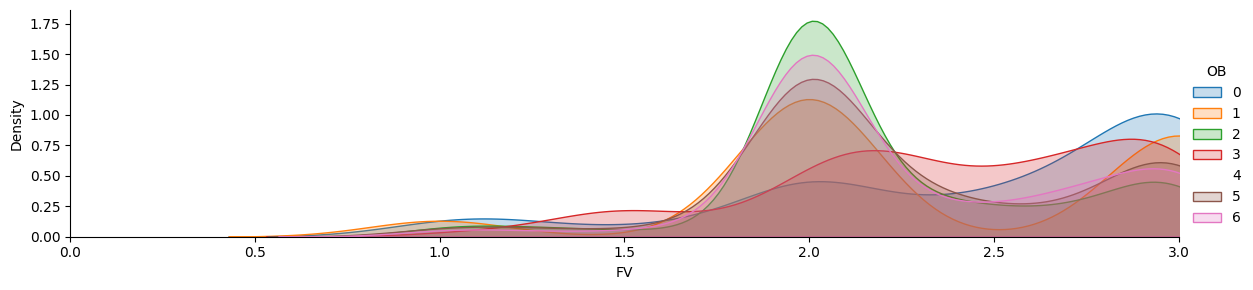

In [52]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'FV', shade=True,)
oldest = data['FV'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

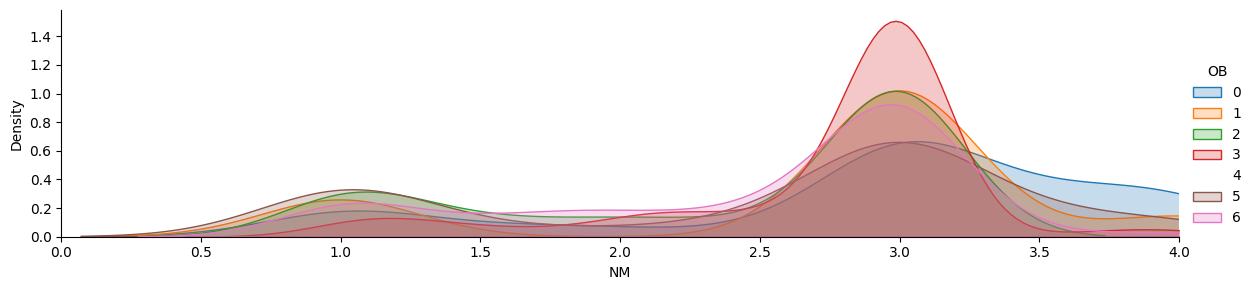

In [53]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'NM', shade=True,)
oldest = data['NM'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

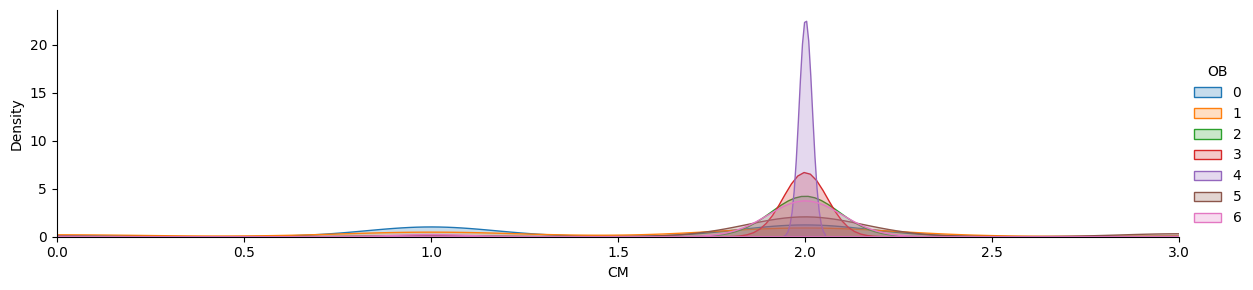

In [54]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'CM', shade=True,)
oldest = data['CM'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

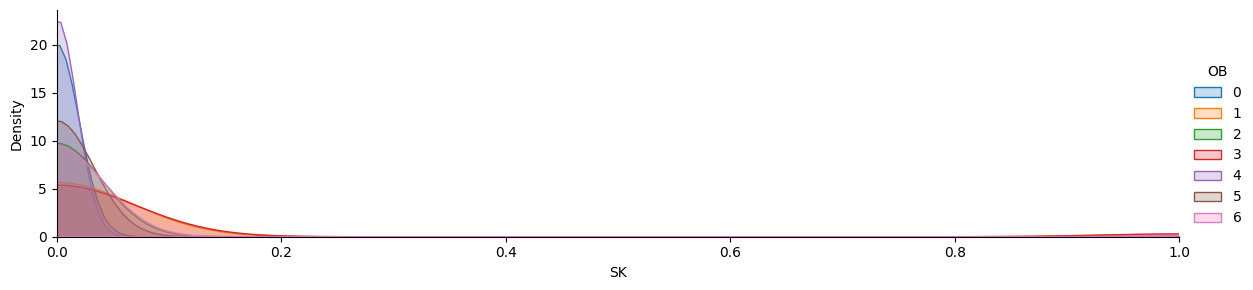

In [55]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'SK', shade=True,)
oldest = data['SK'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

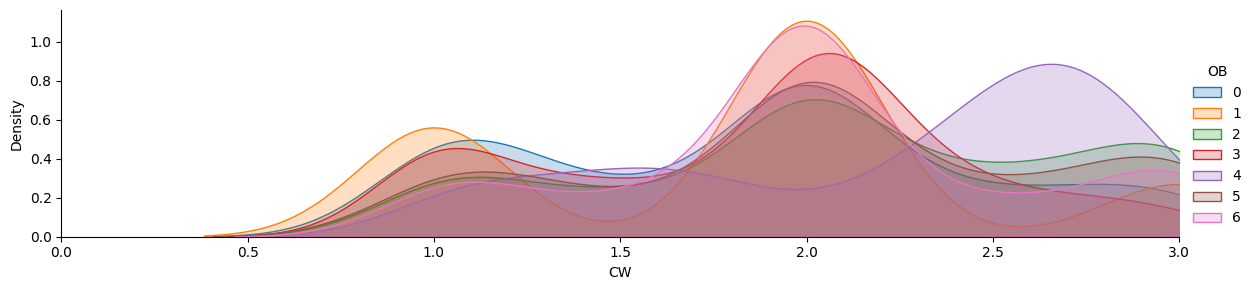

In [56]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'CW', shade=True,)
oldest = data['CW'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

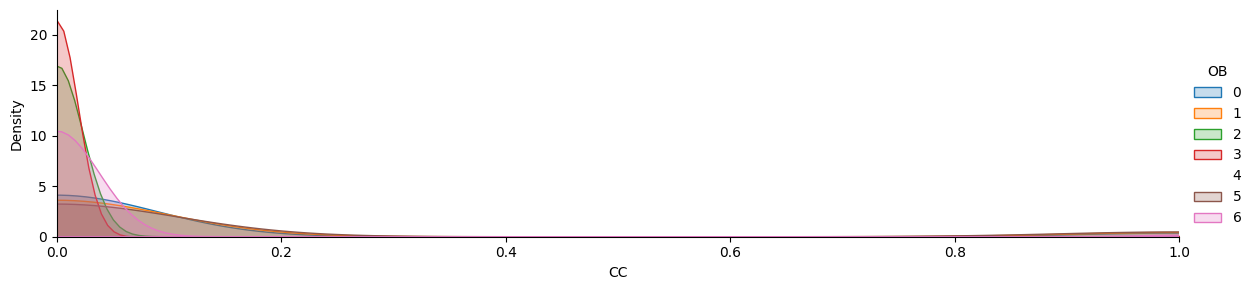

In [57]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'CC', shade=True,)
oldest = data['CC'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

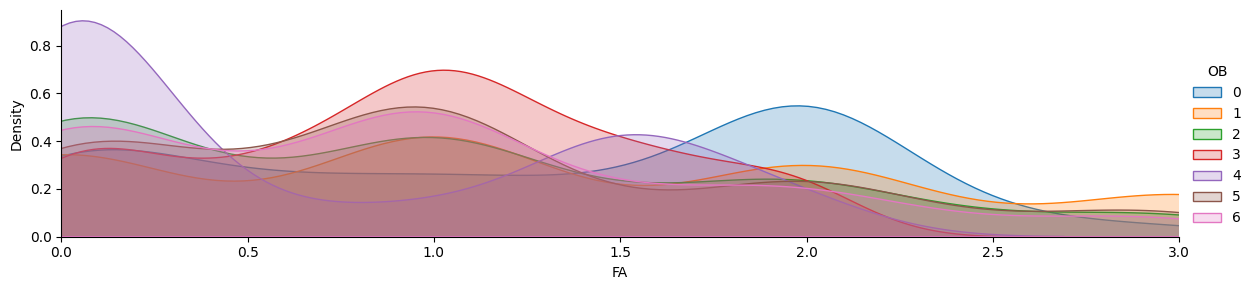

In [58]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'FA', shade=True,)
oldest = data['FA'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

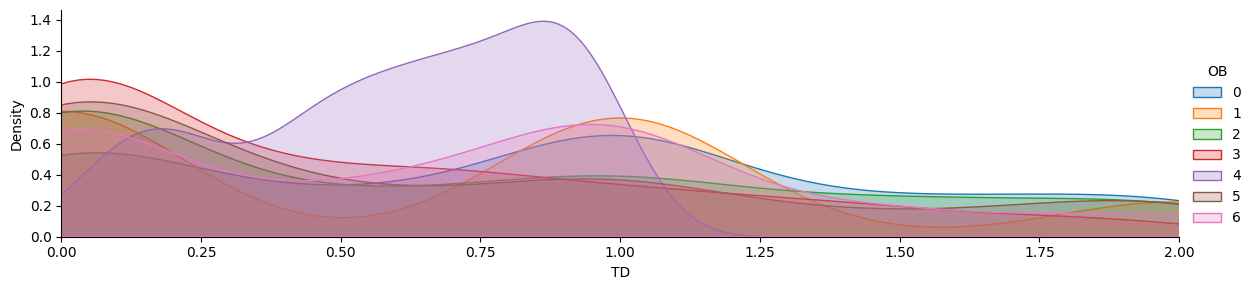

In [59]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'TD', shade=True,)
oldest = data['TD'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

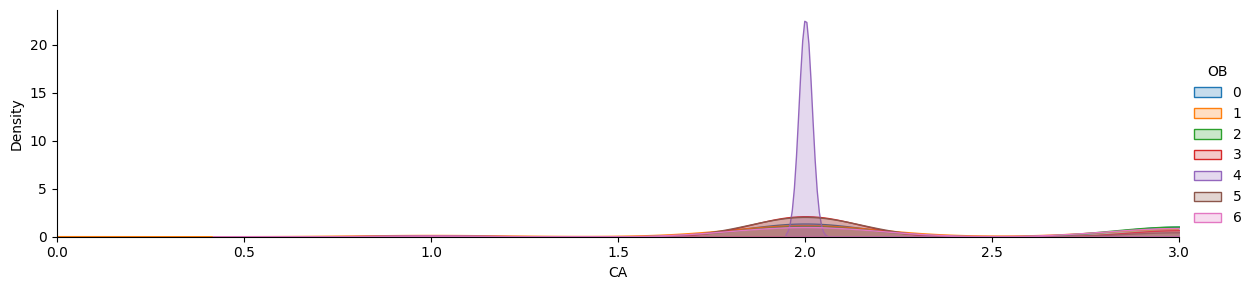

In [60]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'CA', shade=True,)
oldest = data['CA'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



`shade` is

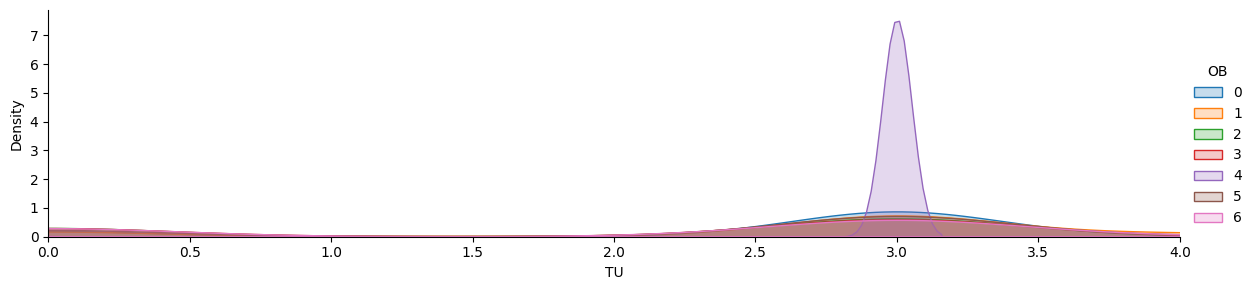

In [61]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="OB", aspect=4)
fig.map(sns.kdeplot, 'TU', shade=True,)
oldest = data['TU'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

## Data Splitting

In [62]:
classes = ["0", "1","2","3","4","5","6"]
X = data.drop(['OB'],axis=1)
Y = data['OB']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [63]:
# # Separate data by class
# class_data = [data[data['OB'] == i] for i in range(7)]
# upsampled_data = []
# for i in range(7):
#     if i == 0 or len(class_data[i]) >= 100:
#         upsampled_data.append(class_data[i])
#     else:
#         upsampled_data.append(resample(class_data[i], replace=True, n_samples=500, random_state=123))

# # Combine the upsampled data into a single DataFrame
# upsampled_df = pd.concat(upsampled_data)

# # Downsample each majority class to 100 samples
# downsampled_data = []
# for i in range(7):
#     if i == 0 or len(class_data[i]) <= 100:
#         downsampled_data.append(class_data[i])
#     else:
#         downsampled_data.append(resample(class_data[i], replace=False, n_samples=250, random_state=123))

# # Combine the downsampled data into a single DataFrame
# downsampled_df = pd.concat(downsampled_data)

# # Print the value counts to check class balance
# print("Upsampled data:\n", upsampled_df['OB'].value_counts())
# print("Downsampled data:\n", downsampled_df['OB'].value_counts())

In [64]:
# # Create subplots for upsampled and downsampled datasets
# f, ax = plt.subplots(1, figsize=(15, 5))

# # Plot the countplot for the upsampled dataset
# sns.countplot(x='OB', data=upsampled_df, ax=ax)
# ax.set_title("Frequency of Obesity in Upsampled Dataset")
# ax.set_xlabel("Class")
# plt.show()


In [65]:
# # Plot the countplot for the downsampled dataset
# f, ax = plt.subplots(1, figsize=(15, 5))
# sns.countplot(x='OB', data=downsampled_df, ax=ax)
# ax.set_title("Frequency of Obesity in Downsampled Dataset")
# ax.set_xlabel("Class")
# plt.show()

In [66]:
# #lets describe the data
# upsampled_df.describe().T

In [67]:
# #lets describe the data
# downsampled_df.describe().T

In [68]:
data.columns

Index(['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC',
       'FA', 'TD', 'CA', 'TU', 'OB'],
      dtype='object')

In [69]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Boosting Techniques

In [141]:
# X = np.array(upsampled_df[['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU', 'OB']])
# Y = np.array(upsampled_df.OB.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

## 1. XGBoost

[22:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.93      0.98      0.96        57
           2       0.97      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       1.00      0.96      0.98        57
           6       0.98      0.96      0.97        55

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Accuracy: 0.9810874704491725


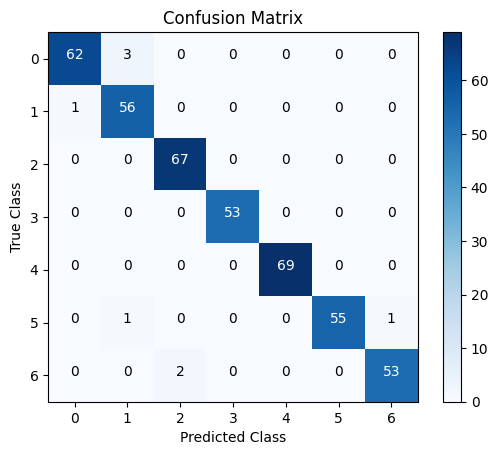

In [142]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# # Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Use XGBClassifier instead of XGBR
Model1 = XGBClassifier(
    learning_rate=0.01, n_estimators=1000, max_depth=10, min_child_weight=6, gamma=0,
    subsample=0.6, colsample_bytree=0.8, reg_alpha=0.005,
    objective='binary:logistic', nthread=2, scale_pos_weight=1, seed=27
)
Model1.fit(X_train, y_train)
y_pred = Model1.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ["0", "1","2","3","4","5","6"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [143]:
featur_names = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features = Model1.feature_importances_
features

array([0.19019629, 0.03831172, 0.05436485, 0.14488584, 0.06206671,
       0.06057376, 0.10482484, 0.04806205, 0.07753102, 0.        ,
       0.03601051, 0.03018213, 0.03065056, 0.03389354, 0.05691846,
       0.03152772], dtype=float32)

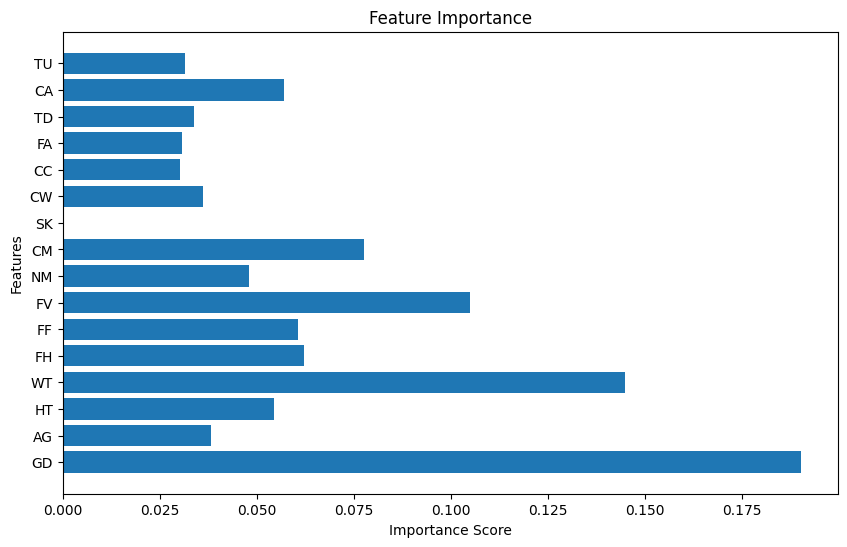

In [144]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

importance_scores = Model1.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


## 2. GB

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        65
           1       0.89      0.96      0.92        57
           2       0.99      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.98      0.93      0.95        57
           6       0.98      0.98      0.98        55

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.98      0.97      0.97       423

Accuracy: 0.9739952718676123


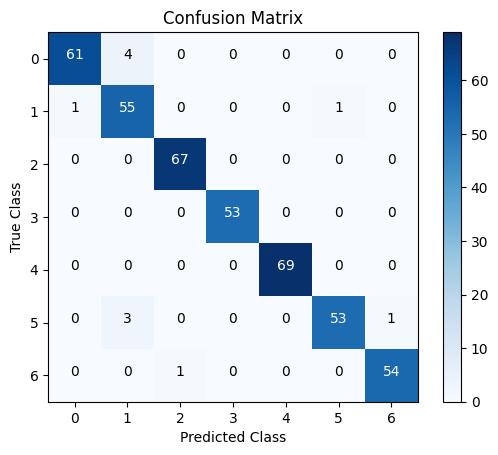

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the Gradient Boosting classifier
Model2 = GradientBoostingClassifier(random_state=45, learning_rate=0.01, n_estimators=1000, max_depth=5)
Model2.fit(X_train, y_train)
y_pred = Model2.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1","2","3","4","5","6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [147]:
#Features Importance Bar Plot
featur_names = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features =Model2.feature_importances_
features

array([0.07517864, 0.03533993, 0.18046835, 0.50911517, 0.00093921,
       0.01221815, 0.0934459 , 0.01783384, 0.01293764, 0.00094846,
       0.01356667, 0.000772  , 0.01192251, 0.00832668, 0.0222873 ,
       0.00469954])

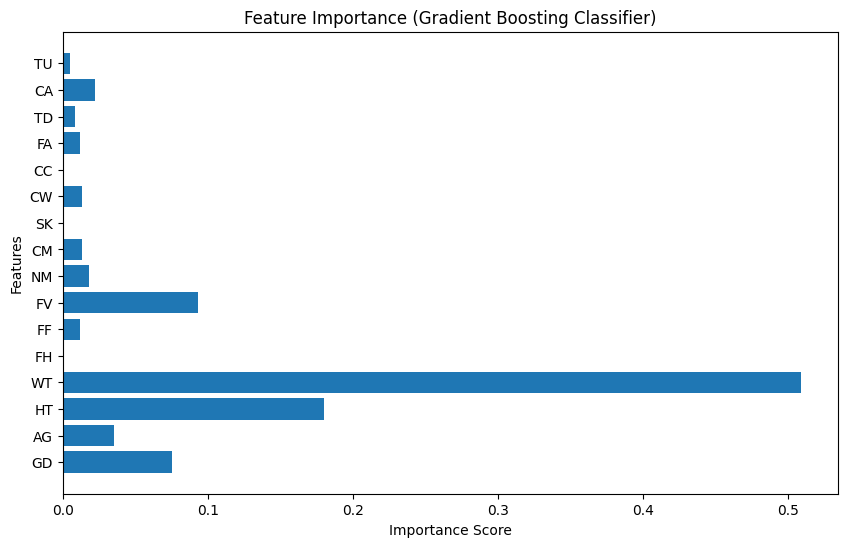

In [148]:
# Get the feature importance scores
importance_scores = Model2.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting Classifier)')
plt.show()

## 3. LGBM

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.88      0.88      0.88        57
           2       0.92      0.99      0.95        67
           3       1.00      0.94      0.97        53
           4       1.00      1.00      1.00        69
           5       0.84      0.86      0.85        57
           6       0.93      0.91      0.92        55

    accuracy                           0.94       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.94      0.94       423

Accuracy: 0.9361702127659575


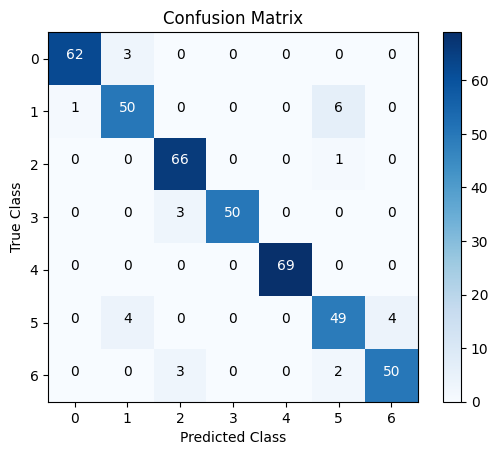

In [149]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the LightGBM classifier
Model3 = LGBMClassifier(random_state=45, learning_rate=0.001, n_estimators=1000, max_depth=7)
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [150]:
#Features Importance Bar Plot
featur_names = ['GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features =Model3.feature_importances_
features

array([ 2859, 15491, 50299, 60113,  1265,  2254, 21613, 13090,  3671,
           0,  9085,  1017, 13400,  9387,  3003,  2396])

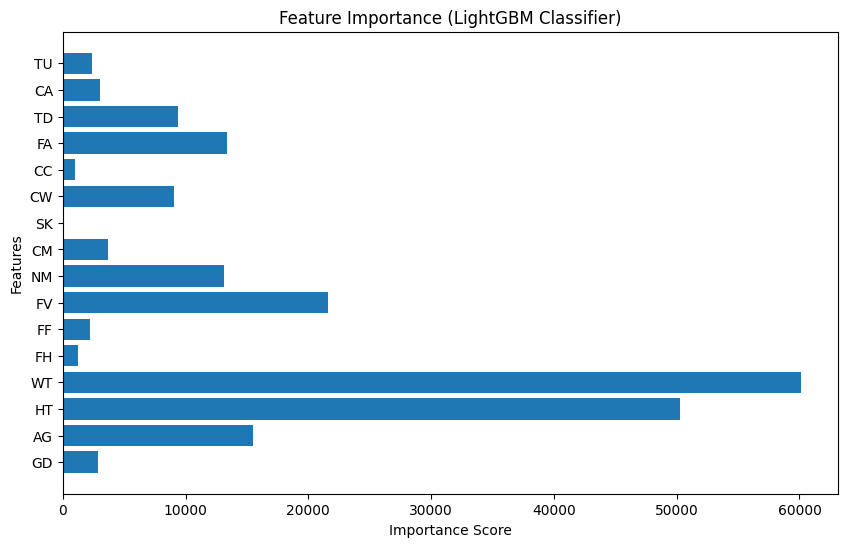

In [151]:
# Get the feature importance scores
importance_scores = Model3.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (LightGBM Classifier)')
plt.show()

## 4. CatBoost

0:	learn: 1.9233320	total: 64.6ms	remaining: 1m 4s
1:	learn: 1.9009817	total: 90ms	remaining: 44.9s
2:	learn: 1.8804883	total: 110ms	remaining: 36.6s
3:	learn: 1.8603776	total: 128ms	remaining: 31.9s
4:	learn: 1.8393350	total: 145ms	remaining: 28.9s
5:	learn: 1.8181121	total: 164ms	remaining: 27.1s
6:	learn: 1.7972971	total: 183ms	remaining: 26s
7:	learn: 1.7773959	total: 205ms	remaining: 25.4s
8:	learn: 1.7586879	total: 227ms	remaining: 25s
9:	learn: 1.7437623	total: 251ms	remaining: 24.9s
10:	learn: 1.7270345	total: 277ms	remaining: 24.9s
11:	learn: 1.7095672	total: 301ms	remaining: 24.8s
12:	learn: 1.6910338	total: 327ms	remaining: 24.8s
13:	learn: 1.6752049	total: 346ms	remaining: 24.4s
14:	learn: 1.6581709	total: 366ms	remaining: 24s
15:	learn: 1.6421567	total: 382ms	remaining: 23.5s
16:	learn: 1.6249978	total: 399ms	remaining: 23.1s
17:	learn: 1.6100571	total: 420ms	remaining: 22.9s
18:	learn: 1.5953687	total: 440ms	remaining: 22.7s
19:	learn: 1.5802224	total: 459ms	remaining: 22

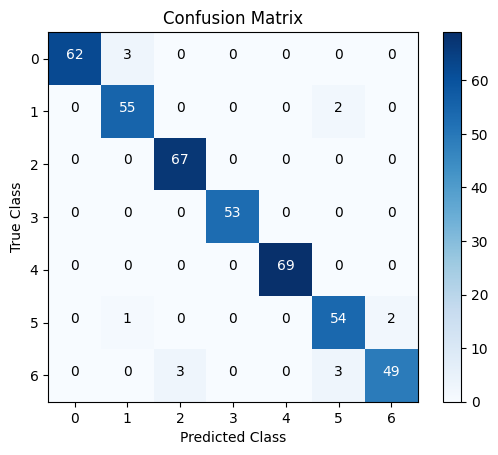

In [152]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming you have already defined upsampled_df and created the 'OB_binary' column

# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model4 = CatBoostClassifier(random_state=45, learning_rate=0.01, n_estimators=1000, max_depth=7)
Model4.fit(X_train, y_train)

# Predict on the test set
y_pred = Model4.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [153]:
#Features Importance Bar Plot
featur_names = ['GD', 'AG', 'HG', 'WG', 'FHOW','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMK', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OB''GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features =Model4.feature_importances_
features

array([9.25930492e+00, 5.88220986e+00, 1.19604377e+01, 4.83448204e+01,
       8.75184375e-01, 1.05088144e+00, 6.39028219e+00, 3.08143794e+00,
       1.76824097e+00, 1.30404813e-02, 1.98072662e+00, 1.22706444e-01,
       2.13004617e+00, 2.43660117e+00, 2.97385011e+00, 1.73022926e+00])

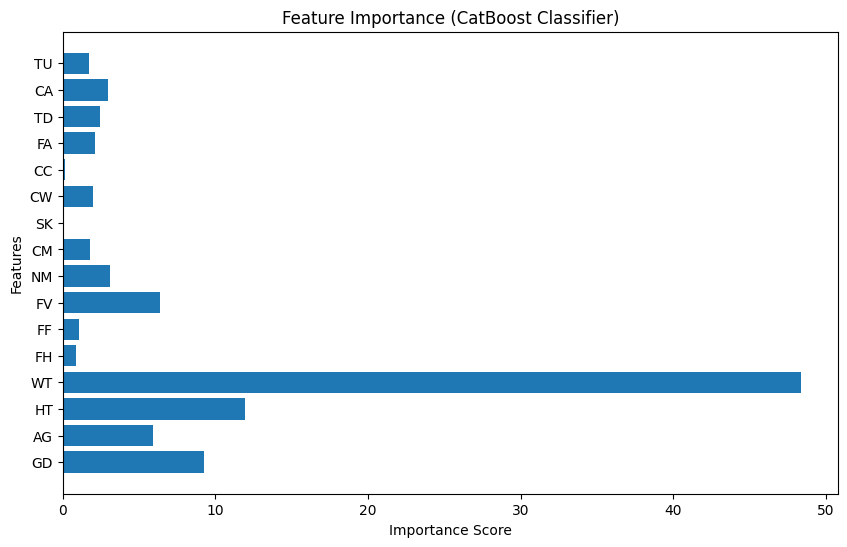

In [154]:
# Get the feature importance scores
importance_scores = Model4.get_feature_importance()
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (CatBoost Classifier)')
plt.show()


## ROC Curve

Model 1 - XGBClassifier


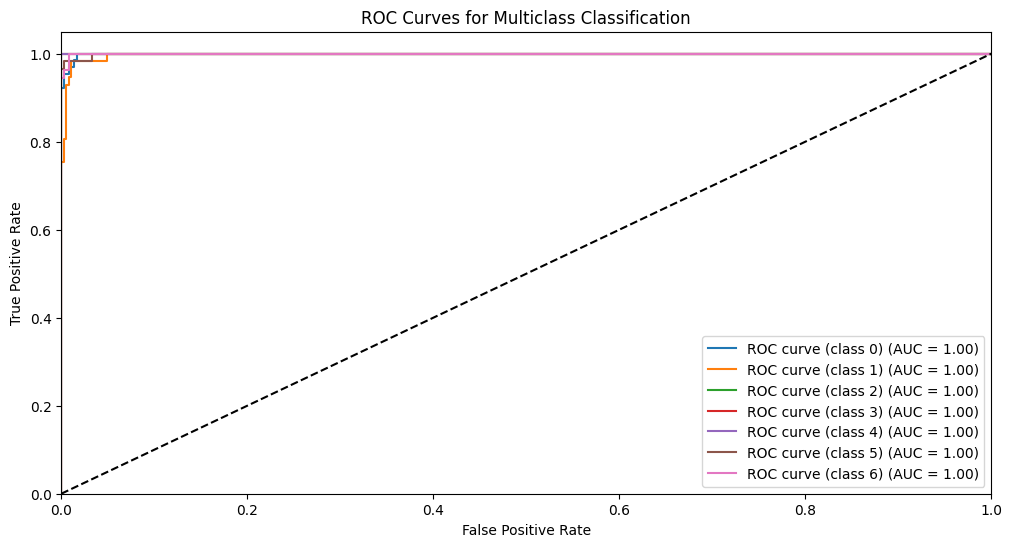

Model 2 - GradientBoostingClassifier


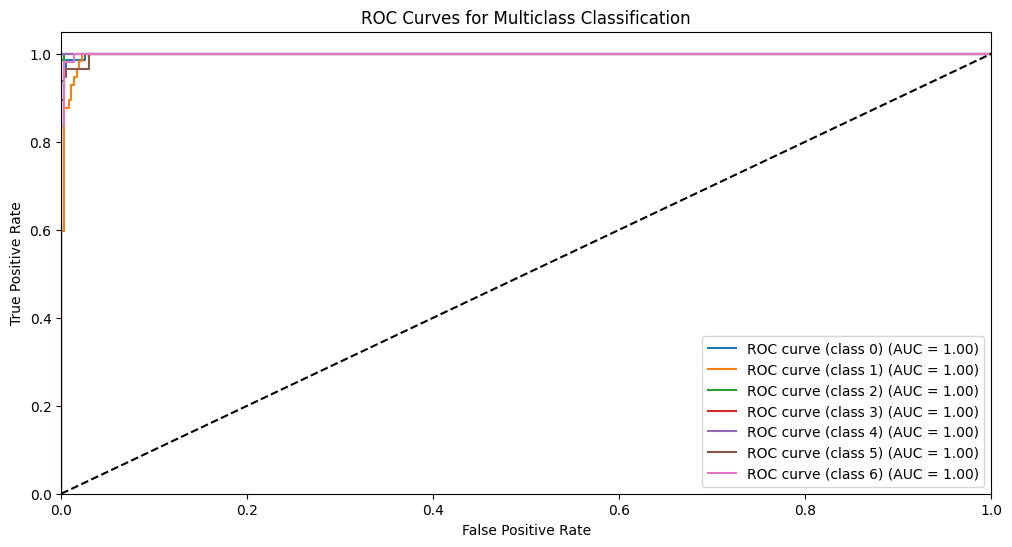

Model 3 - LGBMClassifier


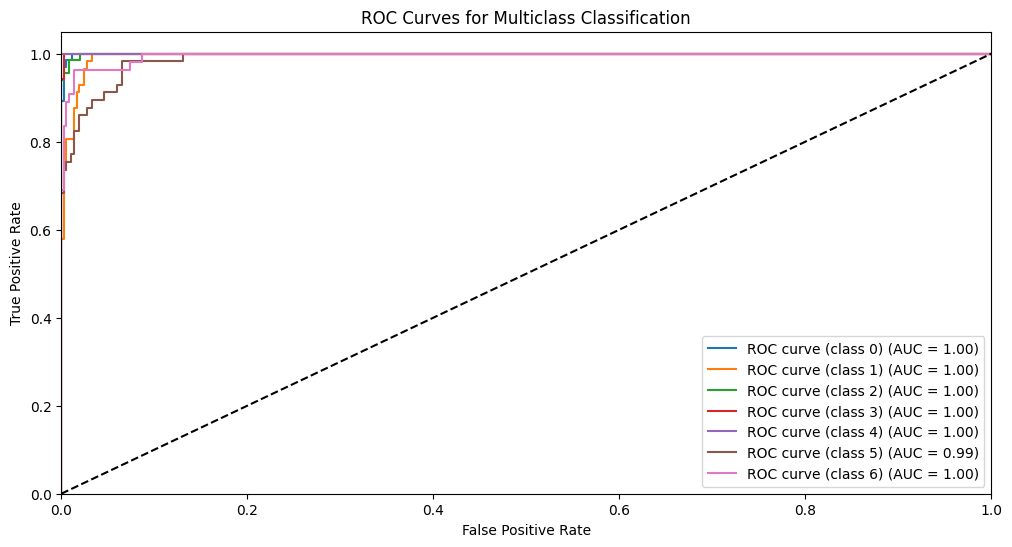

Model 4 - CatBoostClassifier


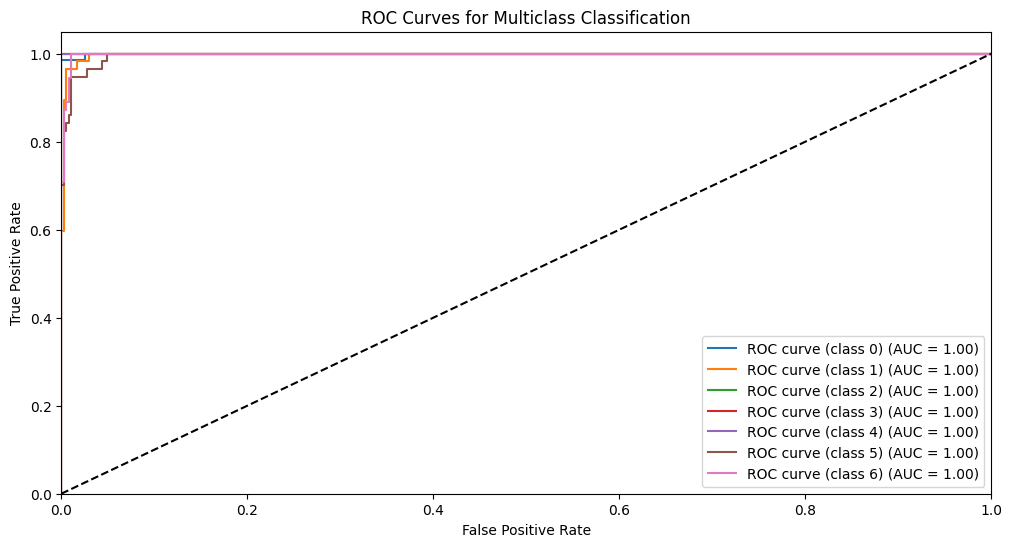

In [155]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# Create and train the CatBoostClassifier (you can adjust the parameters as needed)

# Define a function to plot ROC curves and calculate ROC AUC scores for multiclass classification
def plot_multiclass_roc(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)

    # Initialize empty dictionaries to store ROC AUC values for each class
    roc_auc = {}

    # Initialize dictionaries to store ROC curve values for each class
    fpr = {}
    tpr = {}

    # Convert class labels to a list of unique classes
    classes = np.unique(y_test)

    # Calculate ROC AUC and ROC curves for each class
    for i in range(len(classes)):
        y_true_class_i = (y_test == classes[i]).astype(int)
        y_score_class_i = y_prob[:, i]

        # Calculate ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true_class_i, y_score_class_i)
        roc_auc[classes[i]] = auc(fpr[i], tpr[i])

    # Plot ROC curves for all classes
    plt.figure(figsize=(12, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc[classes[i]]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call the function for each model
models = [ Model1, Model2, Model3, Model4]  # Replace with your model instances
for i, model in enumerate(models):
    print(f"Model {i + 1} - {model.__class__.__name__}")
    plot_multiclass_roc(model, X_test, y_test)


In [156]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# Bagging Techniques

## 1. BDT

In [111]:
from sklearn.ensemble import BaggingClassifier

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        65
           1       0.83      1.00      0.90        57
           2       0.97      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       1.00      0.89      0.94        57
           6       0.98      0.95      0.96        55

    accuracy                           0.96       423
   macro avg       0.97      0.96      0.96       423
weighted avg       0.97      0.96      0.97       423

Accuracy: 0.9645390070921985


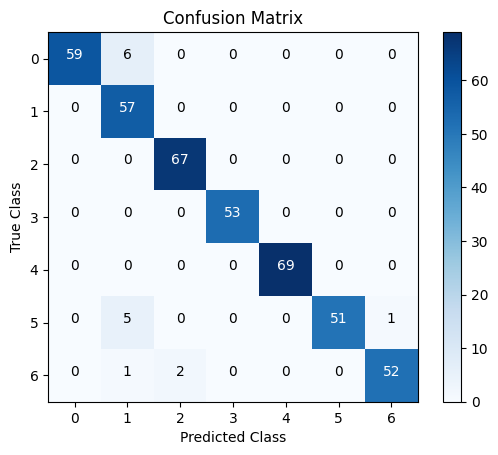

In [157]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model5 = BaggingClassifier( n_estimators=1000, random_state=42, max_features= 0.5, max_samples=1.0, n_jobs=-1)
Model5.fit(X_train, y_train)

# Predict on the test set
y_pred = Model5.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [158]:
# #Features Importance Bar Plot
# featur_names = ['GD', 'AG', 'HG', 'WG', 'FHOW','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMK', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OB''GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
# features =Model6.feature_importances_
# features

In [159]:
# # Get the feature importance scores
# importance_scores = Model6.get_feature_importance()
# feature_names = X_train.columns

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_names, importance_scores)
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.title('Feature Importance (CatBoost Classifier)')
# plt.show()


## 2. RF

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.89      0.88      0.88        57
           2       0.96      1.00      0.98        67
           3       1.00      0.98      0.99        53
           4       1.00      1.00      1.00        69
           5       0.89      0.89      0.89        57
           6       0.96      0.93      0.94        55

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

Accuracy: 0.9527186761229315


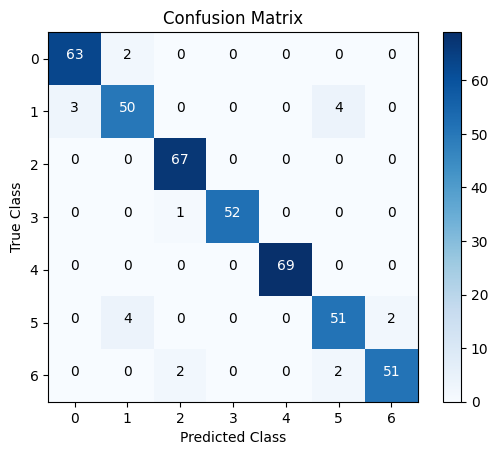

In [160]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model6 = RandomForestClassifier (n_estimators=1000, # number of trees
                                 criterion='gini', # metric for impurity reduction
                                 max_depth=None, # maximum depth of tree
                                 min_samples_split=2, # minimum number of samples required to split an internal node
                                 min_samples_leaf=1, # minimum number of samples required to be at a leaf node
                                 max_features=16, # number of features to consider when looking for best split
                                 bootstrap=True, # sample with replacement
                                 random_state=42 # seed for random number generator
                                 )
Model6.fit(X_train, y_train)

# Predict on the test set
y_pred = Model6.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [161]:
#Features Importance Bar Plot
featur_names = ['GD', 'AG', 'HG', 'WG', 'FHOW','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMK', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OB''GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features =Model6.feature_importances_
features

array([0.15989126, 0.03357241, 0.25484809, 0.45208252, 0.00208412,
       0.02179894, 0.01128424, 0.01090907, 0.01239074, 0.00125699,
       0.00822426, 0.00112002, 0.01248875, 0.0097129 , 0.00507491,
       0.00326077])

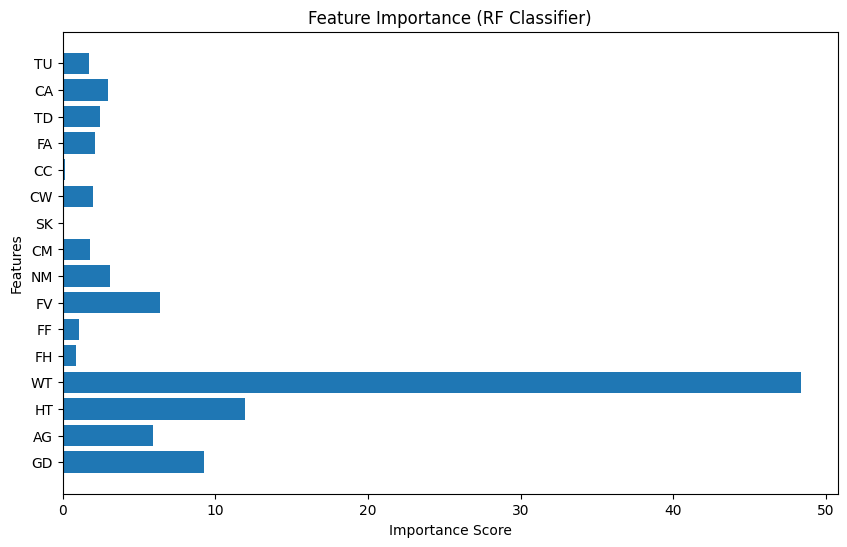

In [162]:
# Get the feature importance scores
# importance_scores = Model7.get_feature_importance()
# feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (RF Classifier)')
plt.show()


## 3. ET

In [164]:
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\Shahid Mohammad\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        65
           1       0.84      0.98      0.90        57
           2       0.99      1.00      0.99        67
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        69
           5       0.98      0.86      0.92        57
           6       0.96      0.93      0.94        55

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423

Accuracy: 0.9621749408983451


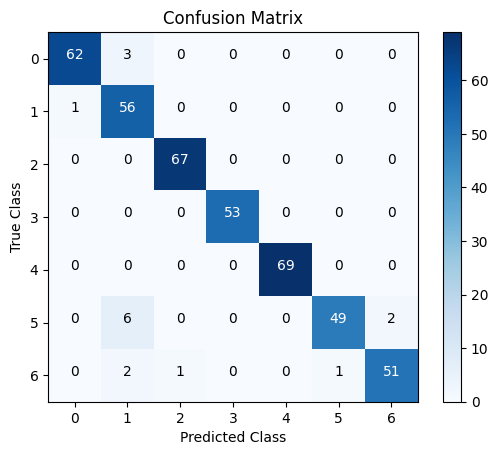

In [165]:
# X = upsampled_df.drop(['OB'], axis=1)
# Y = upsampled_df['OB']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Create and train the CatBoostClassifier
Model7 = ExtraTreesClassifier (n_estimators=1000,  # Number of trees in the forest
                                    criterion='gini',      # Impurity function to measure the quality of a split
                                    max_depth=1000,            # Maximum depth of the tree
                                    min_samples_split=10,       # Minimum number of samples required to split an internal node
                                    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
                                    max_features=10,      # Number of features to consider when looking for the best split
                                    bootstrap=2,            # Whether bootstrap samples are used when building trees
                                    random_state=42                 # Seed used by the random number generator
                                    )
Model7.fit(X_train, y_train)

# Predict on the test set
y_pred = Model7.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [166]:
#Features Importance Bar Plot
featur_names = ['GD', 'AG', 'HG', 'WG', 'FHOW','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMK', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OB''GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
features =Model7.feature_importances_
features

array([0.1046726 , 0.04925032, 0.08192468, 0.40472788, 0.04245805,
       0.02498611, 0.06547168, 0.03936872, 0.03149385, 0.00067526,
       0.02471199, 0.00657924, 0.02201221, 0.02574609, 0.04480393,
       0.03111738])

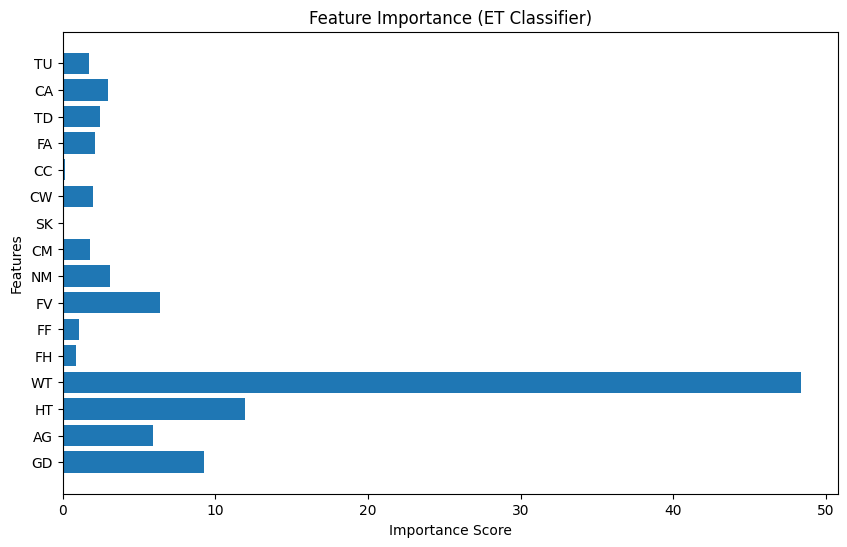

In [167]:
# Get the feature importance scores
# importance_scores = Model7.get_feature_importance()
# feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (ET Classifier)')
plt.show()


## ROC Curve

Model 1 - BaggingClassifier


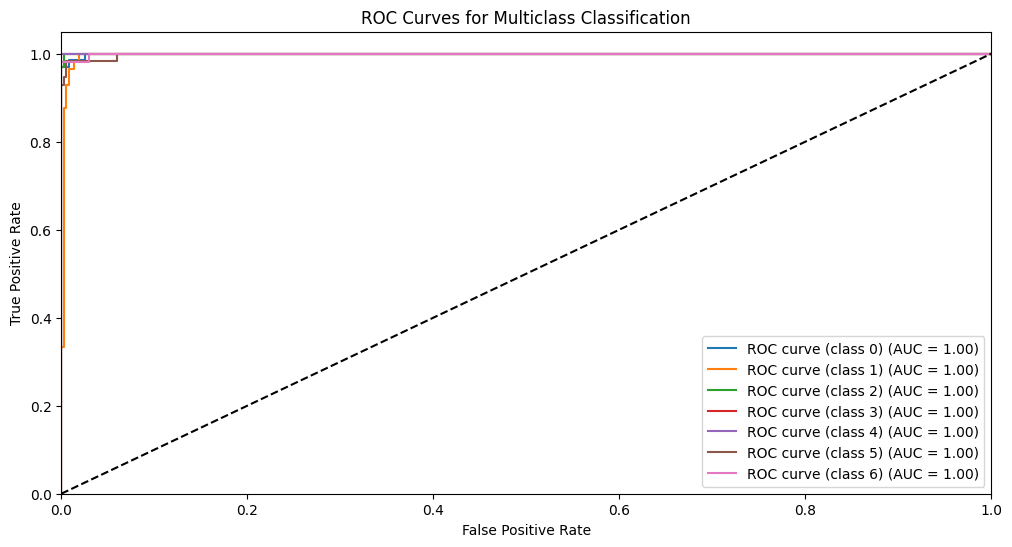

Model 2 - RandomForestClassifier


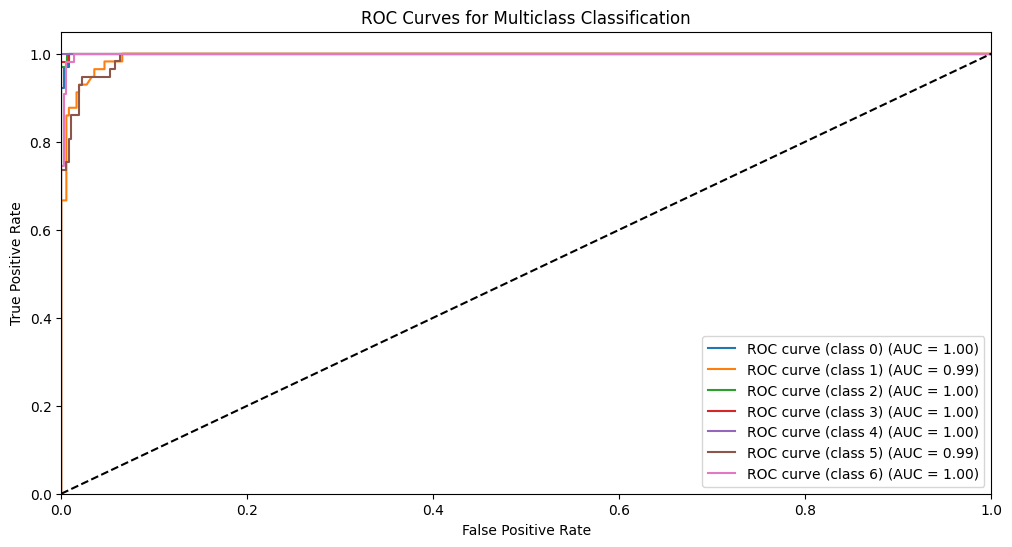

Model 3 - ExtraTreesClassifier


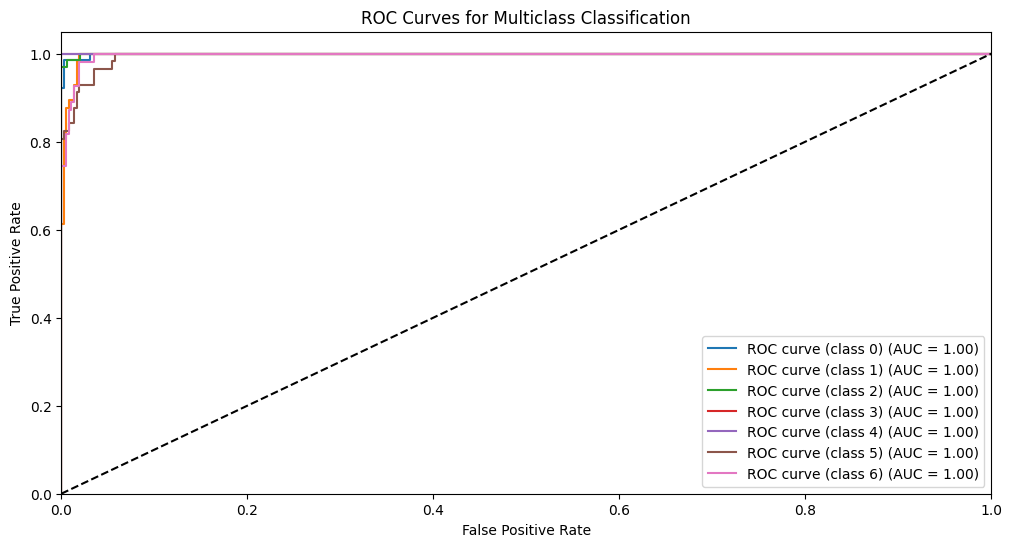

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
# Create and train the CatBoostClassifier (you can adjust the parameters as needed)

# Define a function to plot ROC curves and calculate ROC AUC scores for multiclass classification
def plot_multiclass_roc(model, X_test, y_test):
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)

    # Initialize empty dictionaries to store ROC AUC values for each class
    roc_auc = {}

    # Initialize dictionaries to store ROC curve values for each class
    fpr = {}
    tpr = {}

    # Convert class labels to a list of unique classes
    classes = np.unique(y_test)

    # Calculate ROC AUC and ROC curves for each class
    for i in range(len(classes)):
        y_true_class_i = (y_test == classes[i]).astype(int)
        y_score_class_i = y_prob[:, i]

        # Calculate ROC curve
        fpr[i], tpr[i], _ = roc_curve(y_true_class_i, y_score_class_i)
        roc_auc[classes[i]] = auc(fpr[i], tpr[i])

    # Plot ROC curves for all classes
    plt.figure(figsize=(12, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(classes[i], roc_auc[classes[i]]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call the function for each model
models = [ Model5, Model6, Model7]  # Replace with your model instances
for i, model in enumerate(models):
    print(f"Model {i + 1} - {model.__class__.__name__}")
    plot_multiclass_roc(model, X_test, y_test)


# Stacking Model

In [169]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(solver='liblinear')),
                             ('Tree', DecisionTreeClassifier()),
                             ('SVM', SVC())])

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        65
           1       0.72      0.68      0.70        57
           2       0.78      0.94      0.85        67
           3       1.00      0.96      0.98        53
           4       1.00      1.00      1.00        69
           5       0.93      0.74      0.82        57
           6       0.83      0.71      0.76        55

    accuracy                           0.86       423
   macro avg       0.86      0.85      0.85       423
weighted avg       0.86      0.86      0.86       423

Accuracy: 0.8581560283687943


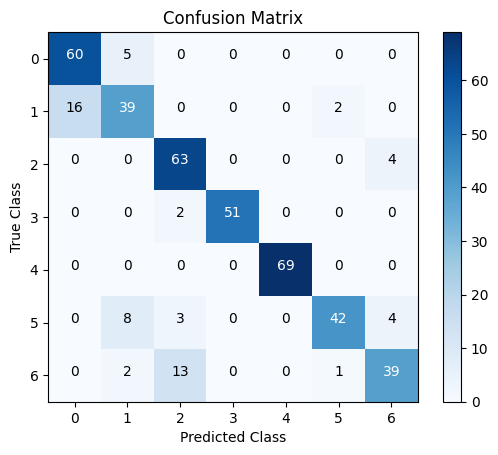

In [170]:
Model9 = voting
Model9.fit(X_train, y_train)

# Predict on the test set
y_pred = Model9.predict(X_test)

# Evaluate the model for multi-class classification
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
classes = ["0", "1", "2", "3", "4", "5", "6"]
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [171]:
# #Features Importance Bar Plot
# featur_names = ['GD', 'AG', 'HG', 'WG', 'FHOW','FAVC', 'FCVC', 'NCP', 'CAEC', 'SMK', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OB''GD', 'AG', 'HT', 'WT', 'FH', 'FF', 'FV', 'NM', 'CM', 'SK', 'CW', 'CC','FA', 'TD', 'CA', 'TU']
# features =Model9.feature_importances_
# features

## End of the Result